# A Simple Perceptron

In this example we have a sample dataset that contains information about likes and shares of a post. We've classified these posts between posts about cats and posts not about cats. We can easily observe there's a trend in the data. Can we find the frontier that separates these regions?

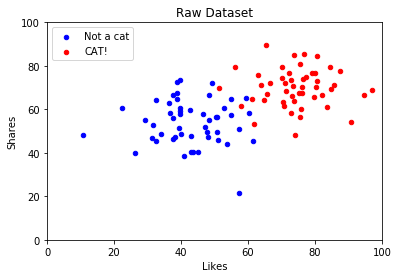

In [1]:
%matplotlib inline

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np


# Load data
data_X = torch.load('/Users/edgarneto/Facebook/pytorch/cats-demo/data/catsX')
data_y = torch.load('/Users/edgarneto/Facebook/pytorch/cats-demo/data/catsY')

# Plot dataset
def plot_dataset(X, y, bottom=0, top=1, left=0, right=1):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'blue', 1:'red'}
    labels = {0:'Not a cat', 1:'CAT!'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    ax.set_ylim(bottom=bottom, top=top)
    ax.set_xlim(left=left, right=right)
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=labels[key], color=colors[key])

## Plot raw dataset
plot_dataset(data_X, data_y, top=100, right=100)
plt.title("Raw Dataset")
plt.xlabel("Likes")
plt.ylabel("Shares")
plt.show()     

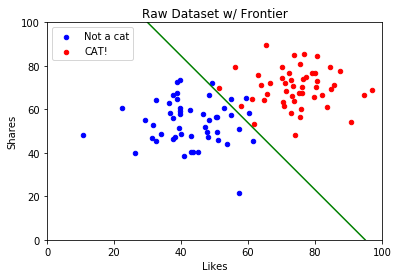

In [2]:
## Plot dataset with frontier
plot_dataset(data_X, data_y, top=100, right=100)
plt.plot([30,95], [100,0], color='g')
plt.title("Raw Dataset w/ Frontier")
plt.xlabel("Likes")
plt.ylabel("Shares")
plt.show()

### Defining the Perceptron
We're going to use an algorithm called gradient descent to iterate over the dataset and try to approximate the frontier to the true value.

In [3]:
## Perceptron
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return (boundary_lines, W, b)


### Training our algorithm
Before we can use this algorithm in our data, we need to normalize our data:

Text(0, 0.5, 'Shares')

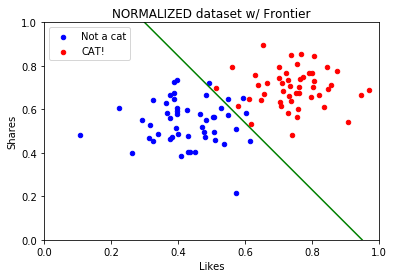

In [4]:
## Normalizing data
normalized_X = data_X / 100

# ## Plot normalized dataset with frontier
plot_dataset(normalized_X, data_y)
plt.plot([0.3,0.95], [1,0], color='g')
plt.title("NORMALIZED dataset w/ Frontier")
plt.xlabel("Likes")
plt.ylabel("Shares")

In [7]:
## Runing the gradient descent
(lines, W, b) = trainPerceptronAlgorithm(normalized_X.double().numpy(), data_y.numpy(), num_epochs=100, learn_rate=0.1)

## Plotting results
# plot_dataset(normalized_X, data_y)
# for l in lines:
#     plt.plot(l, color='grey', linestyle=':')
# plt.plot((-W[0]/W[1], -b/W[1]), color='green', linewidth=3.0)
# plt.show()

print ("Perceptron result: If ({} * likes + {} * shares + {}) >= 0 post has a CAT!".format(W[0], W[1], b))

Perceptron result: If ([0.97649809] * likes + [0.44812656] * shares + -0.7215611017772894) >= 0 post has a CAT!


### Running a prediction
Now that we have our weights we can actually run a prediction

In [10]:
likes = 10
shares = 10

normalized_likes = likes / 100
normalized_shares = shares / 100
prediction = W[0] * normalized_likes + W[1] * normalized_shares + b

has_cat = prediction > 0

print ("Perceptron result: If a post has {} likes, {} shares does it contain a cat? {}".format(likes, shares, has_cat))

Perceptron result: If a post has 10 likes, 10 shares does it contain a cat? [False]
